In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns
%matplotlib inline

In [52]:
data = pd.read_csv('titanic.csv')

In [53]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<Axes: >

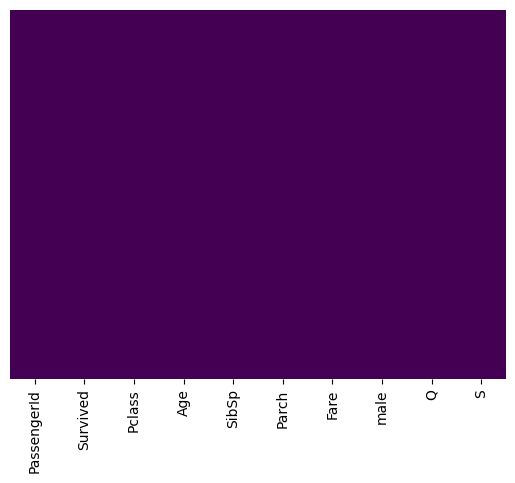

In [54]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [55]:
data.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

<ipython-input-56-001f42dfc8fc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

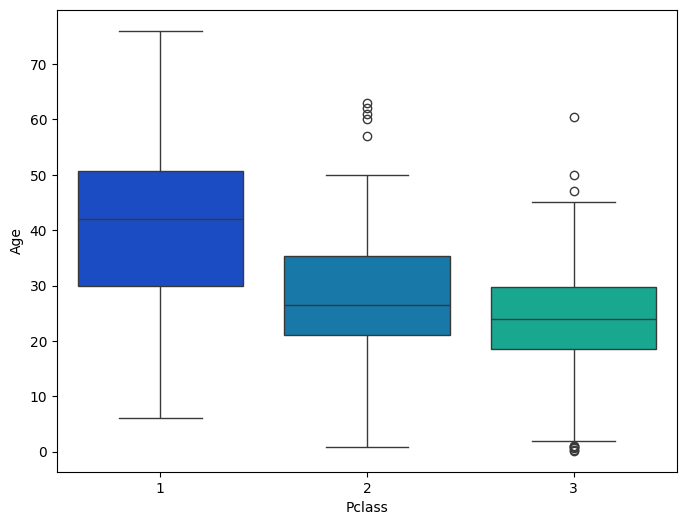

In [56]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')

In [57]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [58]:
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)
data['Embarked'] = data['Embarked'].fillna('S')

<Axes: >

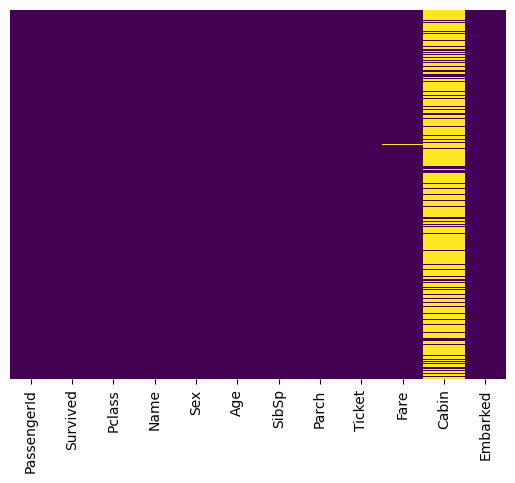

In [59]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [60]:
data.drop('Cabin',axis=1,inplace=True)

In [61]:
data.dropna(inplace=True)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          417 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     417 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 39.1+ KB


In [63]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
embark = pd.get_dummies(data['Embarked'],drop_first=True)
data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
data = pd.concat([train,sex,embark],axis=1)

In [64]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,892,0,3,34.5,0,0,7.8292,True,True,False,True,True,False
1,893,1,3,47.0,1,0,7.0000,False,False,True,False,False,True
2,894,0,2,62.0,0,0,9.6875,True,True,False,True,True,False
3,895,0,3,27.0,0,0,8.6625,True,False,True,True,False,True
4,896,1,3,22.0,1,1,12.2875,False,False,True,False,False,True


In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Survived'],axis=1),
                                                    data['Survived'], test_size=0.10,
                                                    random_state=101)

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rf= RandomForestClassifier(n_estimators=500)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [69]:
rf_pre=rf.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix, classification_report

In [71]:
print(confusion_matrix(y_test,rf_pre))

[[23  0]
 [ 0 19]]


In [72]:
print(classification_report(y_test,rf_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        19

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42

